# AIC-5102B - Lab 1 : tokenization, word embeddings



# 1. Setup
This lab uses Python 3, and two popular NLP packages :
    * NLTK, for text preprocessing, and corporas
    * Gensim, because of its implementation of Word2vec

To install nltk

In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

This will open a window to let you choose what to download. You can download everything (this requires about 3GB of space), but you will only need the “Brown”, and “Reuters” corpora, and the “words” package.

NLTK’s documentation [is here](https://www.nltk.org/api/nltk.html)

# 2. Tokenization

Examine the effect of the basic tokenization functions word_tokenize() on the short Yahoo! news used in class :

In [2]:
import requests
res= requests.get('https://perso.esiee.fr/~hilairex/AIC-5201A/yahoo.txt')
text= str(res.text)
nltk.word_tokenize(text)

['<',
 '!',
 'DOCTYPE',
 'HTML',
 'PUBLIC',
 '``',
 '-//IETF//DTD',
 'HTML',
 '2.0//EN',
 "''",
 '>',
 '<',
 'html',
 '>',
 '<',
 'head',
 '>',
 '<',
 'title',
 '>',
 '403',
 'Forbidden',
 '<',
 '/title',
 '>',
 '<',
 '/head',
 '>',
 '<',
 'body',
 '>',
 '<',
 'h1',
 '>',
 'Forbidden',
 '<',
 '/h1',
 '>',
 '<',
 'p',
 '>',
 'You',
 'do',
 "n't",
 'have',
 'permission',
 'to',
 'access',
 'this',
 'resource.',
 '<',
 '/p',
 '>',
 '<',
 '/body',
 '>',
 '<',
 '/html',
 '>']

Compare with wordpunct_tokenize():

In [3]:
nltk.wordpunct_tokenize(text)

['<!',
 'DOCTYPE',
 'HTML',
 'PUBLIC',
 '"-//',
 'IETF',
 '//',
 'DTD',
 'HTML',
 '2',
 '.',
 '0',
 '//',
 'EN',
 '">',
 '<',
 'html',
 '><',
 'head',
 '>',
 '<',
 'title',
 '>',
 '403',
 'Forbidden',
 '</',
 'title',
 '>',
 '</',
 'head',
 '><',
 'body',
 '>',
 '<',
 'h1',
 '>',
 'Forbidden',
 '</',
 'h1',
 '>',
 '<',
 'p',
 '>',
 'You',
 'don',
 "'",
 't',
 'have',
 'permission',
 'to',
 'access',
 'this',
 'resource',
 '.</',
 'p',
 '>',
 '</',
 'body',
 '></',
 'html',
 '>']

<b>Exercise: </b>
* Tokenize using regexp_tokenize()
* Extend the regular expression so that numbers, amounts of money, ticker symbols, and emails be not cut.

Notice: according to [NLTK's documentation](https://www.nltk.org/api/nltk.tokenize.html), "The pattern used to build this tokenizer [...] must not contain capturing parentheses; Use non-capturing parentheses, e.g. (?:…), instead"

<span style="color:red">Solution: see block below.     
Explanations:
* A number can be comma separated (f_number) or ordinary (o_number)
* An ordinary number is just a set of digits, eventually prefixed by '-', and eventually followed by a dot + some decimals
* A comma separated number uses commas to separate digits in blocks :
    * first block may have between 1 and 3 digits, then a comma
    * next blocks, if they exist, consist of 3 digits + a comma
    * the sequel might include a dot + decimals
* Ticker symbols may include any string of capital letters on either side of a semicolon ':'. An '=' followed by the same string may eventually be appended once.
* Email consists of some characters + '@' + some characters (very relaxed version !)
* Then we find everything else : newline '\n', parenthesis '(' ')', words '\w+', etc.
</span>


In [4]:
number='-?([0-9]+|[0-9]{1,3}(,[0-9]{3})*)(\.[0-9]+)?'
nltk.regexp_tokenize(text, pattern=number)

[('2', '', '.0'), ('403', '', ''), ('1', '', ''), ('1', '', '')]

# 3. Latent semantinc indexing

Take a look at NLTK’s documentation related to the corpus package – https://www.
nltk.org/api/nltk.corpus.html

Then, from nltk.corpus import brown. The corpus consists of a few dozens of short stories, each of them being labelled as the name of the orignal file it was extracted from the corpus. You can list these files thanks to brown.fileids(). The raw(), words(), sents(), and paras() functions either work over the whole corpus if you call them without any argument, or over a specified file.

In [5]:
from nltk.corpus import brown

# uncomment where needed

#brown.fileids()
brown.words()
#brown.sents()
#brown.paras()


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

## 3.1 Document-term matrix

The following function dtmat(corpus) computes and returns the DT matrix of the specified corpus. Extend it so that the matrix be TF-IDF normalized.

In [6]:
import numpy as np

def dtmat(corpus):
    vocab=np.array(list(sorted(set(corpus.words()))))
    rows=len(vocab)  # number of rows
    cols=len(corpus.fileids())
    mat=np.zeros((rows,cols))
    d=0
    for doc in corpus.fileids():
        words=np.array(sorted(list(corpus.words(doc))))
        X=np.searchsorted(vocab,words,side='left')
        for x in X:
            mat[x][d]+=1
        d+=1
    return mat

In [7]:
M=dtmat(brown)

In [8]:
#
# Your answer here
#

def idf(mat):
    return np.log((1+mat.shape[1])/(1+np.sum(mat>0,axis=1)))

def tfidf(mat):
    idf_mat = idf(mat)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            mat[i][j] = np.log(1+mat[i][j]) * idf_mat[i]

    return mat

def tfidf_dtmat(corpus):
    mat=dtmat(corpus)
    mat=tfidf(mat)
    return mat

In [9]:
M=tfidf_dtmat(brown)
M

array([[0.        , 0.        , 0.        , ..., 0.        , 1.63858334,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Questions :
1. Run your function on the Brown corpus. 
2. What is the representation of a given word ? Document ?
3. Assuming the proximity of words or documents is directly measured by their dot products : What are the closest documents ? Write down the indexes of these documents + the value of their dot product, for future comparison.
4. Can you compute the closest *words* with the same technique ?

In [10]:
#
# Your answer here
#

voc. size= 56057
documents 273 and 397
dot product = 1377.8975940433595


## 3.2 Singular value decomposition
Let’s call M the TF-IDF normlized version of DT-matrix you obtained at section 3.1. on the Brown corpus.
1. Plot the cumulative sum of the singular values of M as a graph. The stats.cumfreq() function might prove useful.
2. Find a value of n from above which it is reasonable to vanish the remaining singular values. Call d that value.

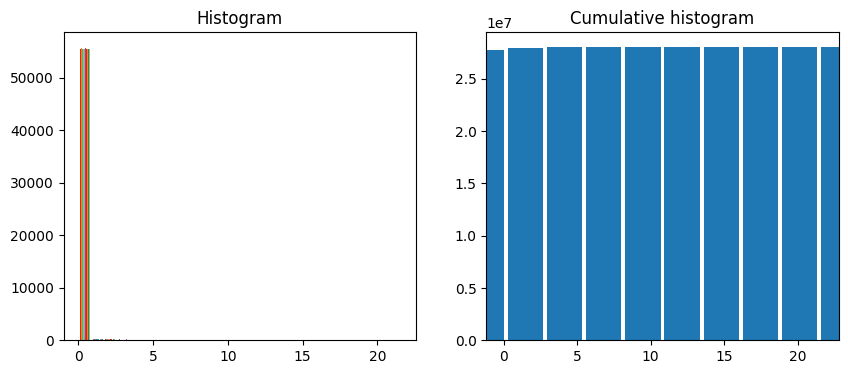

In [10]:
from scipy import stats
import matplotlib.pyplot as plt

res = stats.cumfreq(M)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,res.cumcount.size)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(M, bins=25)
ax1.set_title('Histogram')
ax2.bar(x, res.cumcount, width=res.binsize)
ax2.set_title('Cumulative histogram')
ax2.set_xlim([x.min(), x.max()])
plt.show()

The (U,S,V) = np.linalg.svd(M) call has been made for you. The result is stored at https://mvproxy.esiee.fr/tmp/NLP as separate files, all saved by np.save() :
* U.npy is U. It is a 56057 x 56057 double matrix, and is **huge** (25 GB in memory). Don't even try to load it on your machine
* U500c.npy and U500r.npy are the first 500 columns and rows of U. They use about 250 MB of RAM, but are loadable.
* V.npy is V. It is a 500 x 500 double matrix, and does not cause any issue.
* S.npy are the singular values of M, stored as a simple vector.

4. What is the expression of a change-of-basis matrix P that maps original data from M to the space defined by U.Sigma ? What is the dimension of that space ?
5. Now, vanish the weakest singular values after d in Sigma, and compute U.Sigma using only U500c and Sigma. What is the dimension of U.Sigma ?
6. Compare the dot products of words 41150 and 22016 directly from M, and from the embedded space U.Sigma. Did SVD significantly change the result ?


NOTE : dimension reduction is not very spectacular in this example, because we only have 500 documents, which is far fewer than the vocabulary size 56k. A real corpus would involve hundreds of thousands of documents, but would be processed exactly the same way. 

In [13]:
#
# Your answer here
#

NameError: name 'S' is not defined

# 4. Word2Vec

NLTK does not have an implemention of Word2Vec, but gensim does. To install it :
```
pip3 install gensim
```
Once done, you will simply have to import gensim from Python3. Word2Vec is implemented as a module of gensim.models.

## 4.1 Training from the Brown corpus

We will first try to train a Word2Vec model directly from the Brown corpus. In its simplest form, this results in the following lines (training may take a few minutes on ESIEE's machines ):

In [11]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import brown
model=Word2Vec(brown.sents())
#model.build_vocab(brown.sents())
#model.train(brown.sentences(), total_examples=model.corpus_count, epochs=model.iter)

model.wv[0]


array([ 2.49280736e-01,  1.56148517e+00,  5.15668035e-01,  5.28853655e-01,
       -6.88581467e-01, -9.28207278e-01,  1.59327412e+00, -1.01743355e-01,
       -5.39115787e-01, -4.80008781e-01,  6.44977987e-01,  2.36452341e-01,
        9.55392838e-01, -4.09634531e-01, -4.57119286e-01,  1.01632488e+00,
       -1.34417093e+00, -8.75080049e-01, -4.83107239e-01, -1.31143117e+00,
        7.86753356e-01,  9.87085223e-01,  3.74620706e-01, -5.56198955e-01,
       -7.24783421e-01,  3.25783730e-01,  5.45777738e-01, -1.11780274e+00,
       -1.13554013e+00,  8.41439366e-01, -6.06052041e-01, -3.88270281e-02,
        4.16889712e-02,  8.06536496e-01,  2.77094275e-01, -9.32952404e-01,
        2.00924769e-01, -4.10294831e-01, -1.20562494e+00, -1.97974801e-01,
       -1.12243950e+00,  3.50566059e-01, -7.00372383e-02, -4.39164788e-01,
        1.02416515e+00,  5.57812691e-01,  3.99240553e-01,  9.44167197e-01,
        2.56890744e-01, -5.49361259e-02, -1.07593030e-01,  5.04956961e-01,
        4.67466265e-01, -

Word vectors are then accessible through model.vw 
The wv.similar_by_key() function finds the most similar vectors to that identified by its key, according to the cosine similarity of their embedded representations. 

In [12]:
print(model.wv.most_similar("man"))
print(model.wv.most_similar("administration"))

[('woman', 0.869438648223877), ('girl', 0.866407573223114), ('boy', 0.8125072717666626), ('young', 0.7650755047798157), ('person', 0.7473399639129639), ('child', 0.7470142841339111), ('himself', 0.7464312314987183), ('paradise', 0.7298892736434937), ('martyr', 0.7230910062789917), ('old', 0.7127005457878113)]
[('Soviet', 0.920231282711029), ('leadership', 0.9199120402336121), ('expansion', 0.9155582189559937), ('civilization', 0.9148184061050415), ('co-operation', 0.9131867289543152), ('solar', 0.9124418497085571), ('inherent', 0.907850444316864), ('operation', 0.9068968296051025), ('quantity', 0.9047881960868835), ('progress', 0.9037180542945862)]


The following piece of code represents a sample of N words as a dendrogram, based on their "cosine distance", which is just 1 minus their cosine similarity:

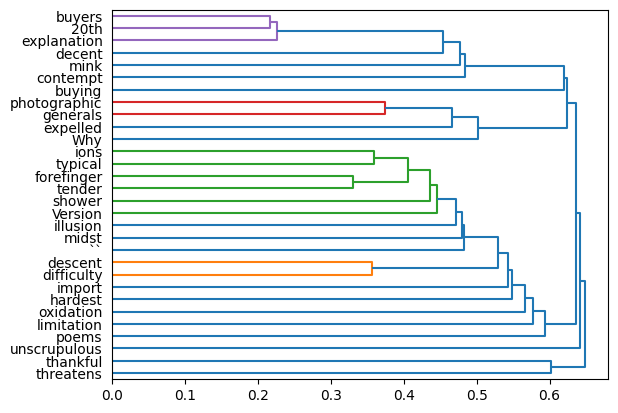

In [13]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# model=Word2Vec(brown.sents());

N=30
pick= np.random.choice(range(0,len(model.wv.index_to_key)), N)

m= np.zeros((N*(N-1))//2)
k=0
for i in range(0,N):
    for j in range(i+1,N):
        m[k]= 1-model.wv.similarity(i,j)
        k=k+1
        

sampwords= [model.wv.index_to_key[n] for n in pick]

Z = hierarchy.linkage(m, 'single')
dn = hierarchy.dendrogram(Z=Z,orientation='right',p=N,truncate_mode='level',labels=sampwords)
plt.show()



Make a function dendro(model, L) of it to represent the similarities between the list of words L. Use it to represent : 'woman','girl','boy','young','Missouri','Boston','Manchester','Hills','moment','place','day','end','pork','sandals',soloist','meat'
Which words cluster well together ?
Try to think of a subset of 3 or 4 classes of words, 4 words / class, and represent them. You should quickly find at least that some words do not cluster well, especially in case of polysemy. Like 'fish' in ['kitchen','food', 'recipe','man','boy','girl','electronics','computer', 'fish','boat','sea'] (can belon to food as well as sea)

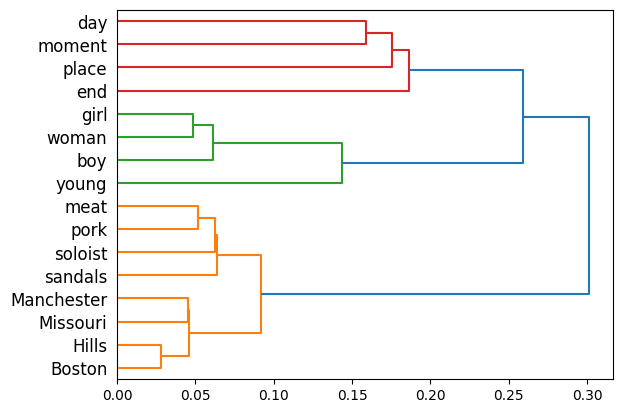

In [14]:
def dendro(model, L=None):
    if type(model) is Word2Vec:
        model = model.wv
    
    if L is None:
        L = np.random.choice(range(0,len(model.index_to_key)), 16)
        L = [model.index_to_key[n] for n in L]
        
    N = len(L)

    M = np.zeros((N*(N-1))//2)
    k = 0

    for i in range(0, N):
        for j in range(i + 1, N):
            M[k] = 1 - model.similarity(L[i], L[j])
            k = k + 1

    # M = model[L].dot(model[L].T)

    Z = hierarchy.linkage(M, 'single')
    _ = hierarchy.dendrogram(Z=Z,orientation='right',p=N,truncate_mode='level',labels=L)
    plt.show()

dendro(model, ['woman','girl','boy','young','Missouri','Boston','Manchester','Hills','moment','place','day','end','pork','sandals','soloist','meat'])
# dendro(model)

## 4.2 Pretrained corpus
In this part, we will explore word vectors on a much larger, pretrained database : Google news 3M words. As the name suggests, the database has been trained over 3 million words picked up from google news articles. 
You have two ways to load it : either by downloading from source, or by using a local copy. I *strongly* recommend you to use the latter, downloading from source not only is slow, but also may lead your notebook to crash.

### 4.2.1 Downloading from local copy
Visit https://mvproxy.esiee.fr/NLP and download the word2vec-google-news-300.kv.vectors.npy and word2vec-google-news-300.kv files to your local hard drive (be careful NOT to cross your homedir/ directory at ESIEE). Then do the following:

In [15]:
from gensim.models import KeyedVectors
gnews=KeyedVectors.load('word2vec-google-news-300.kv')

### 4.2.2 Downloading from source
If you insist downloading directly from source, here is how to do it:

In [ ]:
# import gensim.downloader
# gnews2=gensim.downloader.load('word2vec-google-news-300')

### 4.2.3 Exploring words

Examine the index_to_key and vectors members of gnews. Are the 3 million "words" really relevant ? What is the dimension of the word vectors ?

In [16]:
print(f'number of "words" in the set: {len(gnews.index_to_key)}')
print(f'number of dimensions: {gnews.vector_size}')

# L = np.random.choice(1,len(gnews.index_to_key),10)
# pick = [gnews.index_to_key[n] for n in L]
# print(f'vocabulary: {pick}')

number of "words" in the set: 3000000
number of dimensions: 300


Adapt your dendro() function so that it now operate over gensim's models. Try again your list ['kitchen','food', 'recipe','man','boy','girl','electronics','computer', 'fish','boat','sea'] on gnews. You should obtain something better.

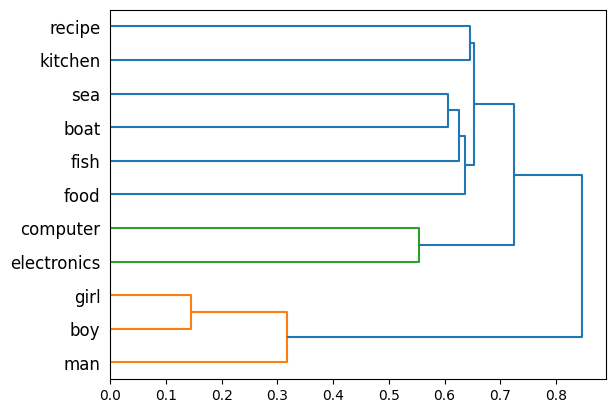

In [17]:
dendro(gnews, ['kitchen','food', 'recipe','man','boy','girl','electronics','computer', 'fish','boat','sea'])

The most_similar(positive=..., negative=...) function finds the vector closest to positive sample(s), and furthest to negative sample(s). 
Use it to answer the following questions, either by providing several positive or negative samples, or by explicitely computing the expected result:
- king is to man as .?. is to women
- women is to man as .?. is to king
- queen is to king as .?. is to man

In [28]:
gnews.most_similar(positive=['queen', 'man'], negative=['king'], topn=10)

[('woman', 0.7609436511993408),
 ('girl', 0.6139993667602539),
 ('teenage_girl', 0.6040961146354675),
 ('teenager', 0.5825758576393127),
 ('lady', 0.5752554535865784),
 ('boy', 0.5077577233314514),
 ('policewoman', 0.5066847801208496),
 ('schoolgirl', 0.5052095651626587),
 ('blonde', 0.48696184158325195),
 ('person', 0.4863754212856293)]

### Anser

- king is to man as *queen* is to women
- women is to man as *queen* is to king
- queen is to king as *woman* is to man

### 4.2.4 Polysemy
Polysemous words are words which have more than a single meaning. For instance, the 'run' word can have plenty of meanings: to run a program, to run a race, to run out of stock, etc. So 'run' is related ro 'race','stock','program'. The 'wing' name can refer to an aircraft's wing, or a chicken's wing, or a building's wing, or a political tendency (left / right wing). So 'wing' related to 'aircraft', 'chicken', 'building', 'politics'.
Try to think of putative polysemic words, and check whether most_similar() returns at least one context you expected within the first 15 first results. If a word does not produce what you expected, does it mean its vector representation is not correct ?

In [50]:
gnews.most_similar(positive=['wing'], negative=['game', 'instrument'], topn=15)

[('rightwing', 0.34769681096076965),
 ('symbol_DCX', 0.33665260672569275),
 ('leftwing', 0.32970139384269714),
 ('wingers', 0.31538379192352295),
 ('columnist_Abdi_Ipekci', 0.3054783046245575),
 ('Wafd_Tagammu', 0.29528918862342834),
 ('Daniela_Santanche', 0.29259607195854187),
 ('Rightwing', 0.2898543179035187),
 ('flank', 0.2812860310077667),
 ('Waseem_Shamzad', 0.2802342474460602),
 ('Manager_MyView_SilkWorm', 0.275849312543869),
 ('Markos_Zuniga', 0.2653258442878723),
 ('white_supremacists_neo_Nazis', 0.26397305727005005),
 ('activist_Noam_Federman', 0.263570636510849),
 ('Paul_Burstow_Liberal', 0.2618127167224884)]

## Answer

Yes, at least one related topic appers in the first 15 results. It's possible to reach others by subtracting the vector of words that already appeared.

### 4.2.5 Synonyms and antonyms
Compute the dot products between 'good', and 'excellent'; 'good' and 'bad'; 'joyful' and 'cheerful'; 'joyful' and 'sad'. Try with other synonyms of your choice.
Is the sign of the dot product representative of synonymy ? How do you explain this ?

In [62]:
gnews.get_vector('good').dot(gnews.get_vector('bad'))

4.061917

## Answer

Even though the sign of the dot product is not representative of synonymy, the magnitude of the dot product is. This is because the vectors are normalized.

### 4.2.6 Bias in word embeddings
Compare the result of :
- gnews.most_similar(positive=['girl','toy'], negative=['boy']) and gnews.most_similar(positive=['boy','toy'], negative=['girl'])
- gnews.most_similar(positive=['girl','hobbies'], negative=['boy']) and gnews.most_similar(positive=['boy','hobbies'], negative=['girl'])

Although toys or hobbies are supposed be genderless, can you say this is true from this example ? 

In [70]:
gnews.most_similar(positive=['boy','hobbies'], negative=['girl'])

[('hobby', 0.6448714137077332),
 ('Hobbies', 0.6248034238815308),
 ('pastimes', 0.5979369282722473),
 ('favorite_pastimes', 0.5710381865501404),
 ('favorite_pastime', 0.5156973004341125),
 ('Favorite_pastimes', 0.5147912502288818),
 ('avocations', 0.512222945690155),
 ('gardening_woodworking', 0.5056727528572083),
 ('woodworking_gardening', 0.4999001622200012),
 ('skateboarding_snowboarding', 0.4936925172805786)]

## Answer

Even though they're supposed to be genderless, there is by default a bias in the word embeddings. This is because the training data is biased.

# 4.3. Autocompletion

If you have extra time, use it to write the following short application.

If you start typing "_President Barack_" on any search engine, it is almost certain you will automatically get "_Obama_" as a suggested completion.

Write an application that demonstrates this, by training again from the Brown corpus, but probably using different parameters than defaults. Which of CBOW and skipgram model should you choose for this task (this is controlled by the sg, and possibly cbow_mean paramaters in the Word2Vec() constructor)?  Why ?

Write your code below, and comment your results.

In [97]:
s = 'President Barack'

r = gnews.most_similar(positive=s.split(), topn=10)
s = s +  ' ' + r[0][0]

print(s)

President Barack Obama
